In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#processed RAWG data
data = pd.read_csv("rawg_data_cleaned.csv")

#multiple linear reggression model
X = data[['playtime', 'achievements_count', 'game_series_count','reviews_count']]
y = data['rating']
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
#predicted rating
prediction = lr.predict(X)

#r^2 score and MSE
r2 = r2_score(y, prediction)
mse = mean_squared_error(y, prediction)

print("R-squared:", r2)
print("Mean Squared Error:", mse)

R-squared: 0.2832636542230845
Mean Squared Error: 0.7129899188192645


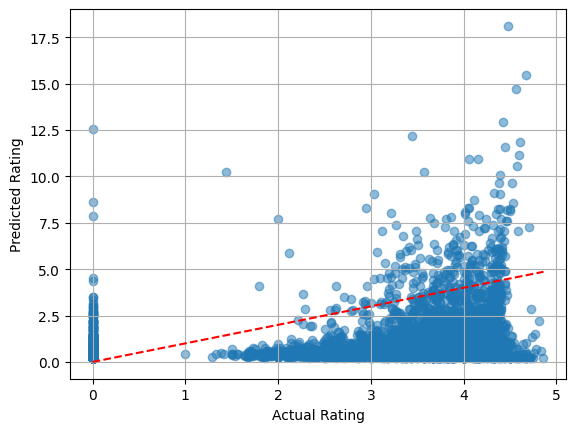

In [ ]:
#predicted rating vs actual rating linear regression graph
plt.scatter(y, prediction, alpha=0.5)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()

In [ ]:
#clustering model
features = ['playtime', 'achievements_count', 'game_series_count', 'reviews_count']
data_cluster = data[features]

scaler = StandardScaler()
scaled = scaler.fit_transform(data_cluster)

In [25]:
#kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled)

data_cluster['cluster'] = clusters

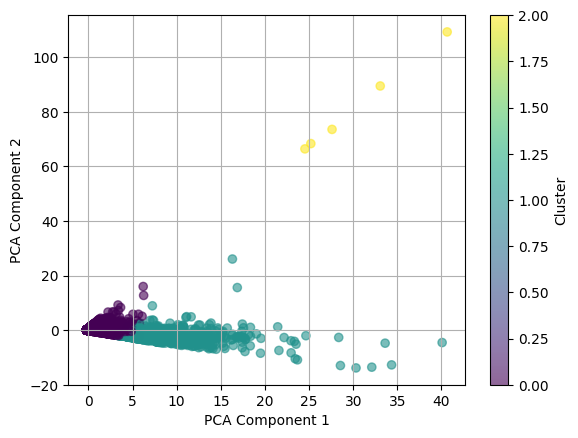

In [26]:
#clustering graph
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()